<a href="https://colab.research.google.com/github/liyachittilappilly/Boston-Housing/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
d = pd.read_csv("/content/boston_housing.csv")
df = d.copy()

X = df[['RM', 'DIS', 'TAX', 'INDUS']]
y = df['MEDV']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #check multicollinearity
import statsmodels.api as sm #to add constant

In [ ]:
X_with_const = sm.add_constant(X) #Add column of 1 as intercept term needed for VIF

vif = pd.DataFrame() # new table
vif['variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i)
              for i in range(X_with_const.shape[1])] #calculates VIF for every column→ tells if feature a correlated. if vif>5, correlated

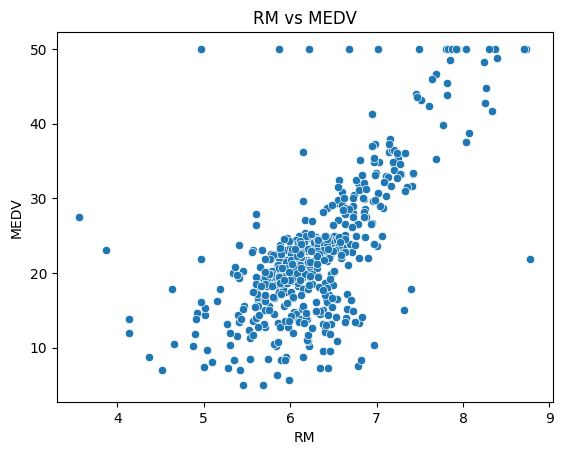

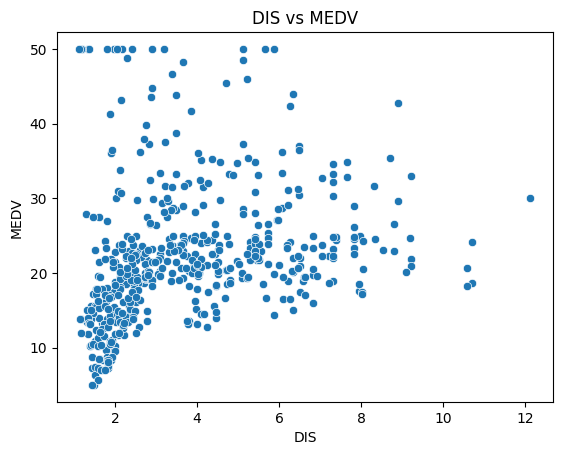

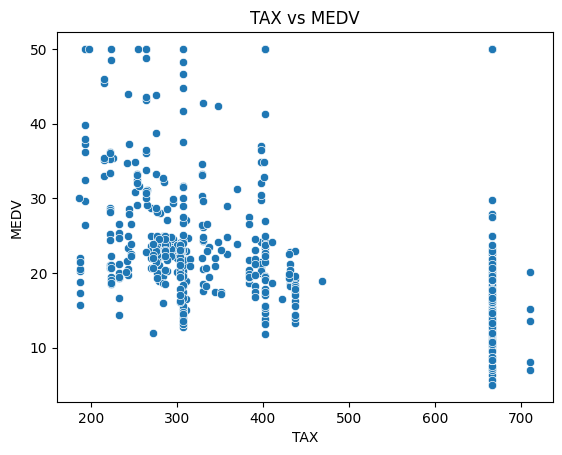

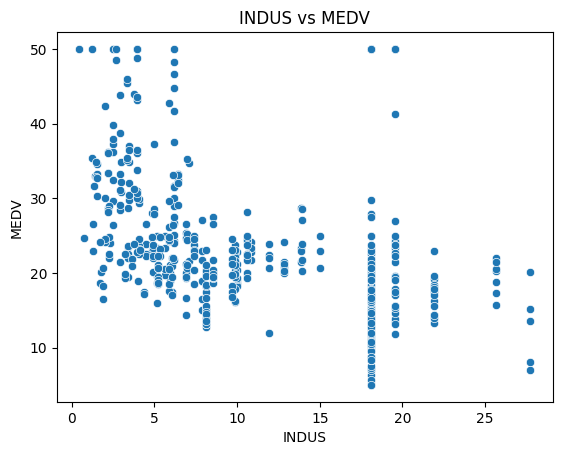

In [ ]:
finalpred = X.columns.tolist() #make list of chosen features (here we keep all 4 even if vif is high)

for col in finalpred:
    sns.scatterplot(x=df[col], y=y)  #feature vs price
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split( X[finalpred], y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(xtrain, ytrain)

print("\nModel Coefficients:")
for col, coef in zip(finalpred, model12345678910.coef_): #gives values of column with coef learned by model
    print(f"{col}: {coef:.4f}") #rounded to 4 decinal

print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
RM: 7.7909
DIS: -0.3925
TAX: -0.0140
INDUS: -0.1352
Intercept: -17.5882


In [ ]:
ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)

In [ ]:
mse_train = mean_squared_error(ytrain, ytrainpred)
mse_test = mean_squared_error(ytest, ytestpred)

In [ ]:
r2_train = r2_score(ytrain, ytrainpred)
r2_test = r2_score(ytest, ytestpred)

R² = 1 → perfect prediction
R² = 0 → bad

Adding more predictors increases R², even if the new predictors are useless.

In [ ]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

Adjusted R²  penalizes the R² if useless feature added    
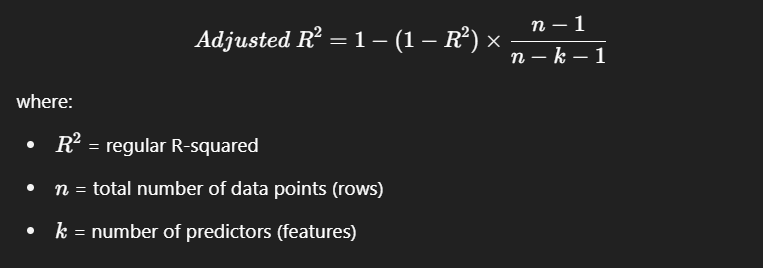

In [ ]:
adj_r2_train = adjusted_r2(r2_train, xtrain.shape[0], xtrain.shape[1])
adj_r2_test = adjusted_r2(r2_test, xtest.shape[0], xtest.shape[1])

In [ ]:
print(f"\nTrain MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")

print(f"Train R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

print(f"Train Adjusted R-squared: {adj_r2_train:.4f}")
print(f"Test Adjusted R-squared: {adj_r2_test:.4f}")


Train MSE: 39.7564
Test MSE: 29.7351
Train R-squared: 0.5490
Test R-squared: 0.6071
Train Adjusted R-squared: 0.5436
Test Adjusted R-squared: 0.5974
